In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)
import plotly.graph_objects as go

# Data Load

In [8]:
df_analyse=pd.read_csv('../data/processed/COVID_small_sync_timeline_table.csv',sep=';')

In [10]:
df_analyse.head()
df_analyse.sort_values('date',ascending=True).head()
country_list = df_analyse.columns[1:]

# Helper functions

In [11]:
def quick_plot(x_in, df, y_scale = 'log', slider = False, xname = ' ', yname = ' ', figname = ' '):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
        xname : str
            Title of the X axis
        yname : str
            Title of the Y axis
        figname : str
            Title of the figure
        
        Returns:
        ----------
        Return type: Figure
    
    """    
    fig = go.Figure()
    for each in df.columns:
        fig.add_trace(go.Scatter(x=x_in, 
                                 y=df[each], 
                                 name= each,
                                 mode= 'markers+lines',
                                 line_width = 1,
                                 marker_size = 3)
                     )
    fig.update_layout(xaxis_title = xname,
                      yaxis_title = yname,
                      width = 1000, 
                      height = 800,
                      title={
                        'text': figname,
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'}
                    )
    fig.update_yaxes(type = y_scale)
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )    
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,3:-1],
           y_scale='log',
           slider=True)

In [20]:
# check that all data are there
df_poly_check=df_analyse.iloc[0:27,3:-1].reset_index()
df_poly_check.head()

,index,Italy,US,Spain,Germany,"Korea, South"
0,0,155.0,184.0,165.0,188.0,204.0
1,1,229.0,237.0,222.0,240.0,433.0
2,2,322.0,403.0,259.0,349.0,602.0
3,3,453.0,519.0,400.0,534.0,833.0
4,4,655.0,594.0,500.0,684.0,977.0


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [14]:
df_poly_check = df_analyse.iloc[0:27,4:-1].reset_index()

In [22]:
df_poly_check.head()
y = df_poly_check[['US','Italy','Spain','Germany']].unstack().sort_index(axis=0, level=1)
y.tail()

US       25    165698.0
Germany  26     52547.0
Italy    26     47021.0
Spain    26     80110.0
US       26    192079.0
dtype: float64

In [23]:
# Prepare train and test data
test_points = 28
y_train = y[0:-test_points-1]
y_test = y[-test_points:]
X_train = np.arange(len(y_train)).reshape(-1,1)/5.0
X_test = np.arange(len(y_train),len(y_train)+test_points).reshape(-1,1)/5.0

In [24]:
import seaborn
seaborn.set(rc={'figure.figsize':(16,8)})  # plot formatting, prepare for subplot 

In [25]:
def PolynomialRegression(degree = 2, **kwarg):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwarg))

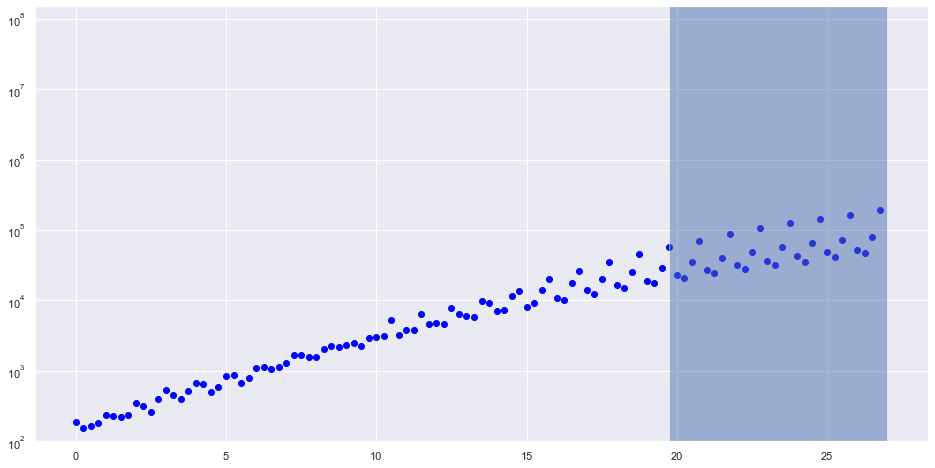

In [26]:
fig, axl = plt.subplots(1,1)

axl.scatter(np.arange(len(y))/4, y, color = 'blue')
axl.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor = 'b', alpha = 0.5)

axl.set_ylim(100,150000000)
axl.set_yscale('log')

In [27]:
from sklearn.metrics import mean_absolute_error

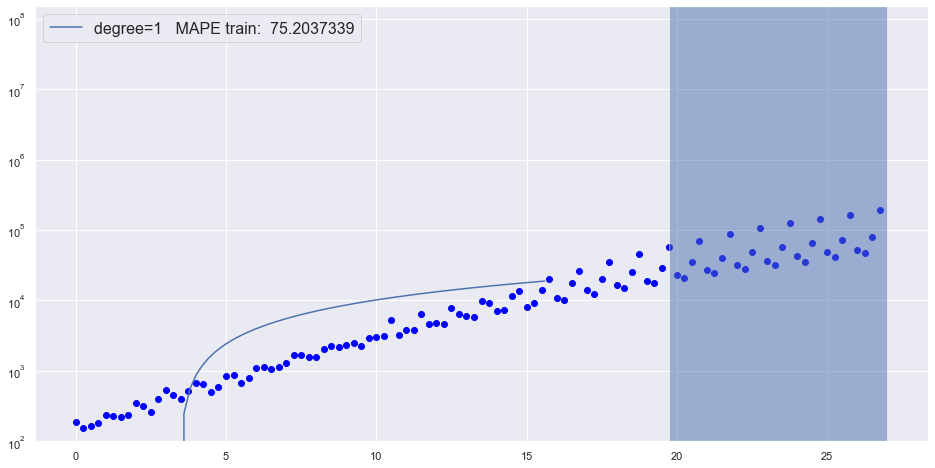

In [28]:
fig, axl = plt.subplots(1,1)

axl.scatter(np.arange(len(y))/4, y, color = 'blue')
axl.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor = 'b', alpha = 0.5)

degree = 1
y_hat_insaple = PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
# X-train is the index on the x axis
# y_train is the points in blue colour corresponding to x axis
# insample prediction is the data on the light gray side on which we train and predict
# insample means we are doing check on insample dataset
# hat means predicted variable
axl.plot(X_train, y_hat_insaple, label = 'degree={0}'.format(degree) + '   MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:10])
# X_train is the x axis
# y_hat_insaple is the predicted y
# degree = {0} is the polynomial degree
# we have put calculated MSE in string format as we can concatenate two strings
# [0:10] means to show 9 digits in MSE value including decimal
# if you will run the above two commands i.e., y_hat_insaple and axl.plot under for degree in [1,2,3,5] you will get different..
# ...degree curves
axl.set_ylim(100,150000000)
axl.set_yscale('log')
axl.legend(loc = 'best', prop = {'size' : 16}); 
# loc is the location,prop keyword to adjust the legend size
# the semicolon is to avoid the text line which appears before graph

In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

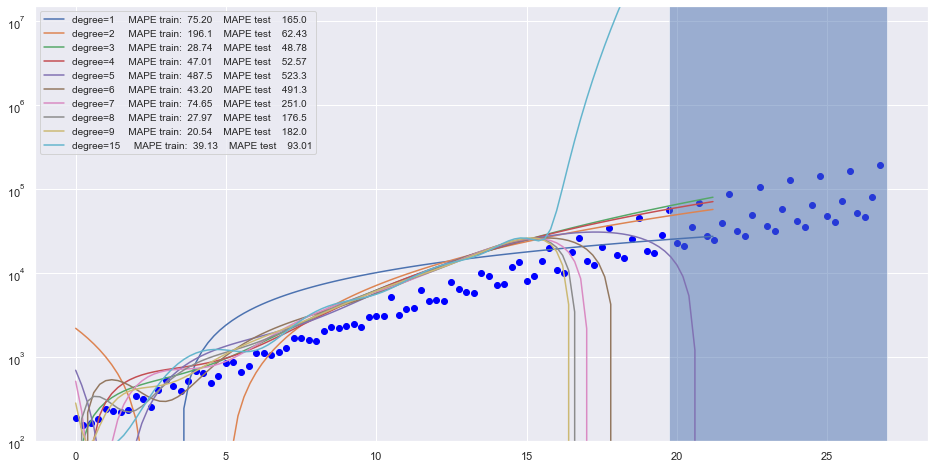

In [30]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1,2,3,4,5,6,7,8,9,15]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)



    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

    ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:5]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:5]) 

ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',prop={'size': 10});